In [1]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [2]:
irisdata = load_iris()

In [3]:
import matplotlib

matplotlib.rcParams['font.family']='sans-serif'

matplotlib.rcParams['font.sans-serif'] = ['SimHei']

Text(0, 0.5, 'petal width')

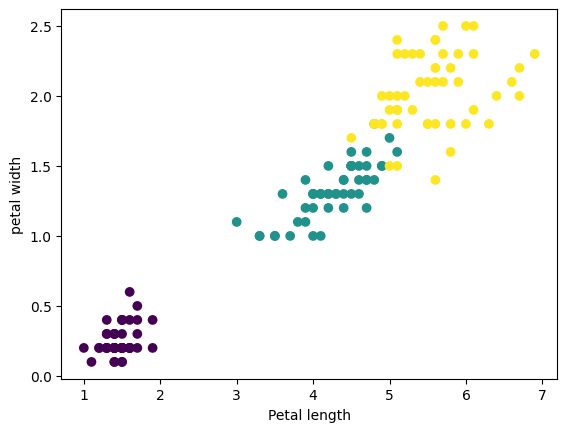

In [5]:
plt.scatter(irisdata.data[:,2],irisdata.data[:,3],c=irisdata.target)

plt.xlabel("Petal length")

plt.ylabel("petal width")

In [6]:
X=irisdata.data[irisdata.target!=0]

y=irisdata.target[irisdata.target!=0]

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=1234)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [10]:
knn.score(X_test,y_test)

0.94

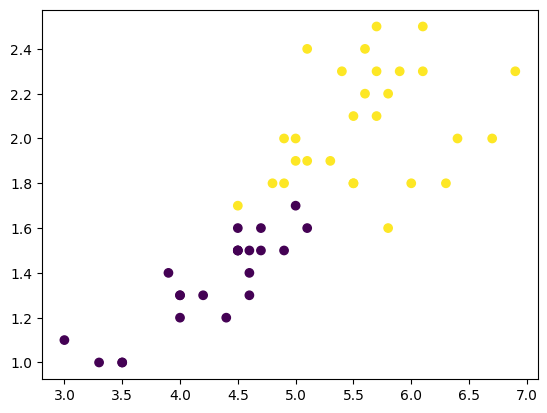

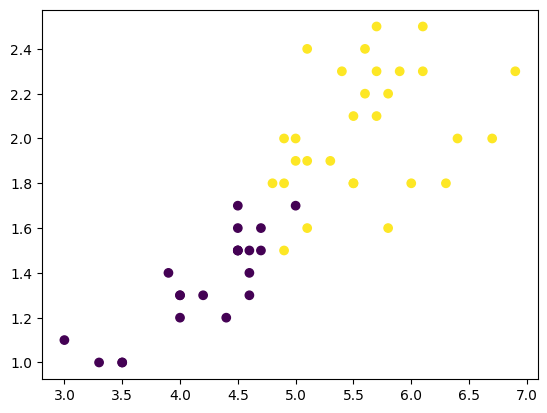

In [11]:
plt.scatter(X_test[:,2],X_test[:,3],c=y_test)

plt.show()

plt.scatter(X_test[:,2],X_test[:,3],c=knn.predict(X_test))

# 逻辑回归 #

In [12]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

In [13]:
classifier = LogisticRegression()

classifier.fit(X_train, y_train)

LogisticRegression()

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
acc = accuracy_score(y_test,y_pred)

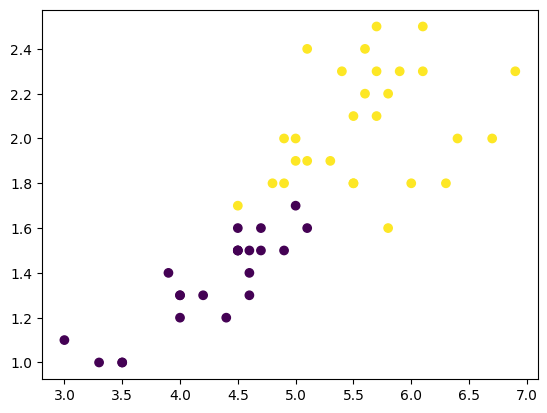

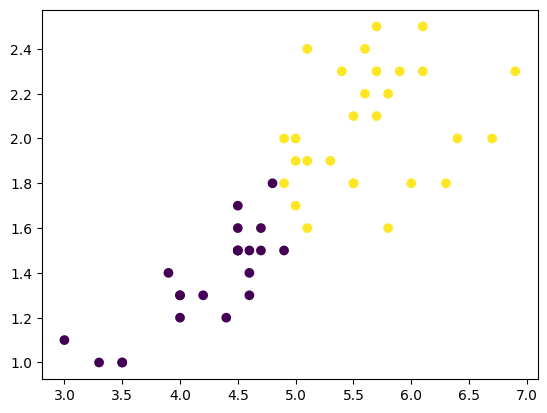

In [17]:
plt.scatter(X_test[:,2], X_test[:,3], c=y_test)
plt.show()
plt.scatter(X_test[:,2], X_test[:,3], c=y_pred)

In [18]:
from sklearn.metrics import roc_curve,auc

predictions=classifier.predict_proba(X_test)#每一类的概率

false_positive_rate, recall, thresholds = roc_curve(y_test, predictions[:, 1],pos_label=2)

roc_auc=auc(false_positive_rate,recall)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


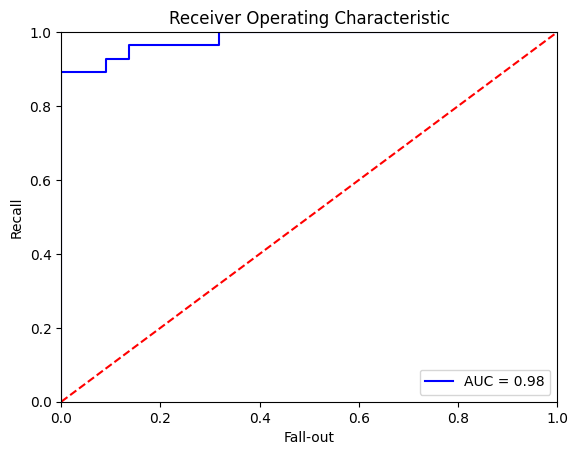

In [19]:
plt.title('Receiver Operating Characteristic')

plt.plot(false_positive_rate, recall, 'b', label='AUC = %0.2f' % roc_auc)

plt.legend(loc='lower right')

plt.plot([0,1],[0,1],'r--')

plt.xlim([0.0,1.0])

plt.ylim([0.0,1.0])

plt.ylabel('Recall')

plt.xlabel('Fall-out')

plt.show()

# 决策树 #

In [20]:
#决策树库

from sklearn.tree import DecisionTreeClassifier


# 计算准确率库

from sklearn.metrics import accuracy_score# 利用训练数据集训练决策树模型

In [21]:
classifier=DecisionTreeClassifier()

classifier.fit(X_train,y_train.ravel())

DecisionTreeClassifier()

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
acc = accuracy_score(y_test,y_pred)

print("the accuarcy of prediction is", acc)


the accuarcy of prediction is 0.96


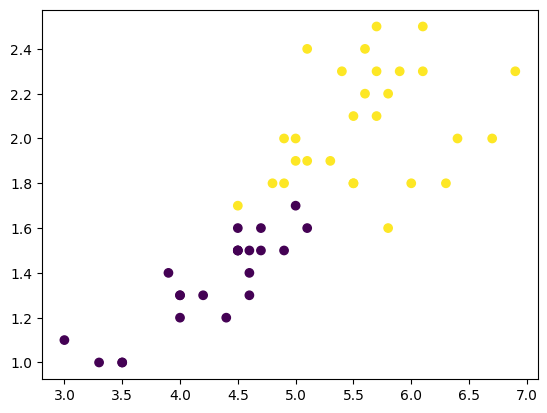

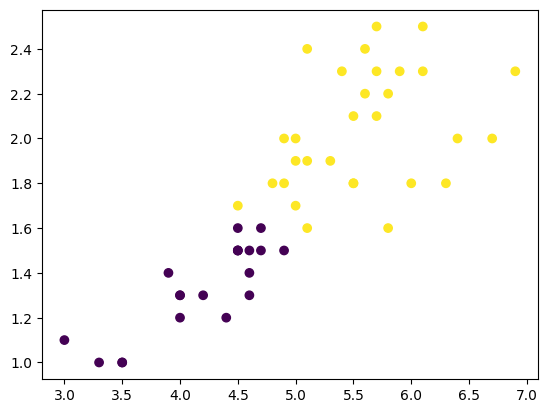

In [24]:
plt.scatter(X_test[:,2], X_test[:,3], c=y_test)

plt.show()

plt.scatter(X_test[:,2], X_test[:,3], c=y_pred)

In [25]:
from sklearn import tree

tree.export_graphviz(classifier,out_file="tree.dot"  )

In [26]:
f = open("tree.dot","r")   #打开文件

fr = f.read()  #读取文件

print(fr)

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[2] <= 4.95\ngini = 0.493\nsamples = 50\nvalue = [28, 22]"] ;
1 [label="X[3] <= 1.65\ngini = 0.124\nsamples = 30\nvalue = [28, 2]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 27\nvalue = [27, 0]"] ;
1 -> 2 ;
3 [label="X[1] <= 3.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]"] ;
1 -> 3 ;
4 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 20\nvalue = [0, 20]"] ;
0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


逻辑回归与决策树模型对比：

从分类结果上来看，两类模型对测试集样本的分类是完全相同的，说明两模型的训练结果是比较一致的。所以对这个问题来说，这两类模型都能很好地区分样本的类别。但是决策树的判别规则可以很直观的展示出来，而且决策树可以进一步通过随机森林或者其他优化算法优化结果，所以我们更偏向于使用决策树模型。

# SVM #

In [27]:
from sklearn import svm

In [28]:
clf = svm.SVC(C =1.8, kernel = 'linear')       

clf.fit(X_train, y_train)

SVC(C=1.8, kernel='linear')

In [29]:
acc = clf.score(X_test,y_test)

print("the accuarcy of prediction is", acc)

the accuarcy of prediction is 0.94


In [30]:
###通过decision_function()计算得到的y_score的值，用在roc_curve()函数中

y_score = clf.decision_function(X_test)

 

# Compute ROC curve and ROC area for each class

fpr,tpr,threshold = roc_curve(y_test, y_score,pos_label=2) ###计算真正率和假正率

roc_auc = auc(fpr,tpr) ###计算auc的值

<Figure size 640x480 with 0 Axes>

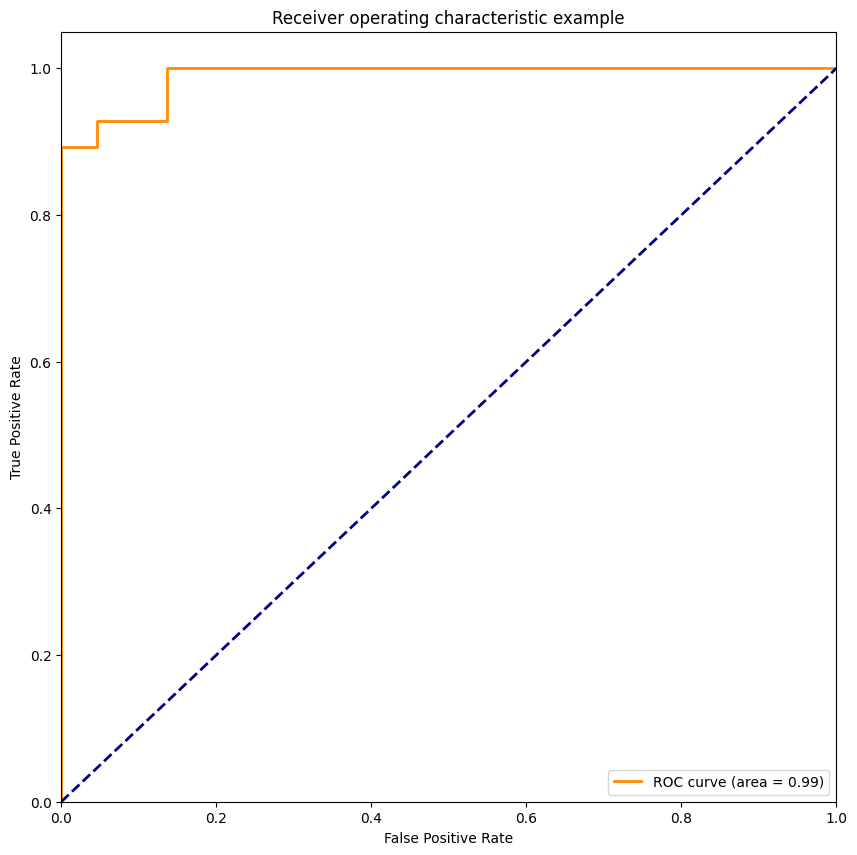

In [31]:
plt.figure()

lw = 2

plt.figure(figsize=(10,10))

plt.plot(fpr, tpr, color='darkorange',

         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic example')

plt.legend(loc="lower right")

plt.show()

SVM与决策树模型对比：

虽然svm分类器的结果也很好，但是其实svm的优势在该数据集中并没有发挥出来，以至在参数选择时核函数也是选择的线性核函数，可谓是“杀鸡用牛刀，出力不讨好”。svm希望通过将原始数据转化到高维空间后完成样本的分类。但其实原始数据集本身就是近似线性可分的了，所以利用svm并没有较大帮助，反而因为模型复杂提高了运算时间且略微降低了精度。